#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 3s 7ms/step - loss: 0.7316 - accuracy: 0.7587 - val_loss: 0.5072 - val_accuracy: 0.8202
Epoch 2/10
430/430 [==============================] - 3s 6ms/step - loss: 0.4770 - accuracy: 0.8338 - val_loss: 0.4347 - val_accuracy: 0.8506
Epoch 3/10
430/430 [==============================] - 3s 6ms/step - loss: 0.4274 - accuracy: 0.8520 - val_loss: 0.4093 - val_accuracy: 0.8606
Epoch 4/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3996 - accuracy: 0.8621 - val_loss: 0.3863 - val_accuracy: 0.8686
Epoch 5/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3813 - accuracy: 0.8683 - val_loss: 0.3713 - val_accuracy: 0.8742
Epoch 6/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3675 - accuracy: 0.8718 - val_loss: 0.3687 - val_accuracy: 0.8742
Epoch 7/10
430/430 [==============================] - 3s 6ms/step - loss: 0.3557 - accuracy: 0.8759 - val_loss: 0.3564 - val_accuracy: 0.8784
Epoch 

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

313/313 - 1s - loss: 0.3692 - accuracy: 0.8709
accuracy: 87.09%


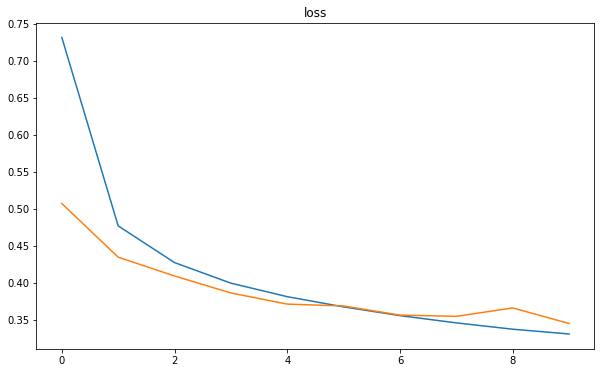

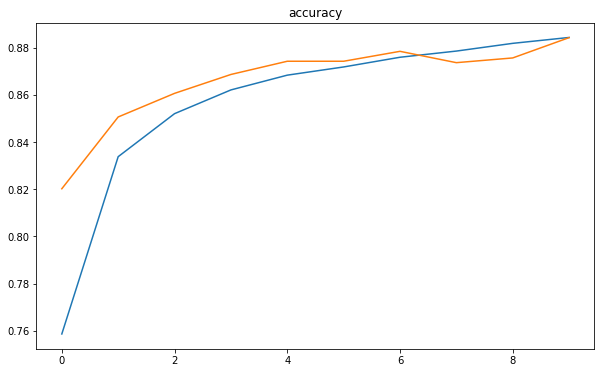

In [7]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

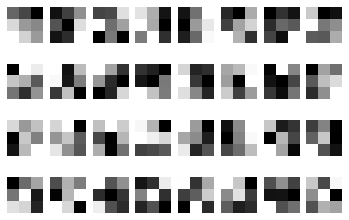

In [8]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.


Model creation using the functions Conv2D e MaxPool2D

Epoch 1/100
184/184 [==============================] - 8s 46ms/step - loss: 0.6146 - accuracy: 0.7808 - val_loss: 0.3309 - val_accuracy: 0.8802
Epoch 2/100
184/184 [==============================] - 8s 44ms/step - loss: 0.3793 - accuracy: 0.8648 - val_loss: 0.2800 - val_accuracy: 0.8960
Epoch 3/100
184/184 [==============================] - 8s 44ms/step - loss: 0.3284 - accuracy: 0.8851 - val_loss: 0.2495 - val_accuracy: 0.9072
Epoch 4/100
184/184 [==============================] - 8s 44ms/step - loss: 0.2931 - accuracy: 0.8939 - val_loss: 0.2247 - val_accuracy: 0.9198
Epoch 5/100
184/184 [==============================] - 8s 44ms/step - loss: 0.2683 - accuracy: 0.9028 - val_loss: 0.2152 - val_accuracy: 0.9224
Epoch 6/100
184/184 [==============================] - 8s 44ms/step - loss: 0.2470 - accuracy: 0.9109 - val_loss: 0.2097 - val_accuracy: 0.9212
Epoch 7/100
184/184 [==============================] - 8s 44ms/step - loss: 0.23

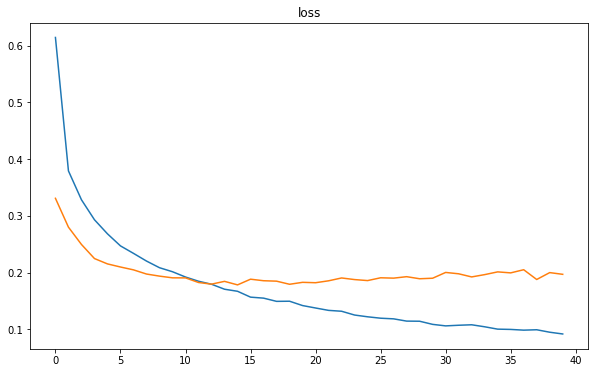

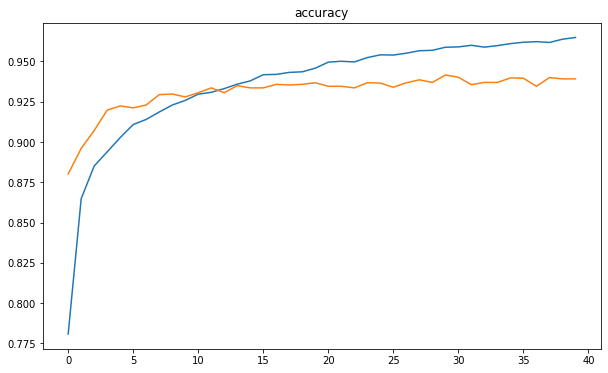

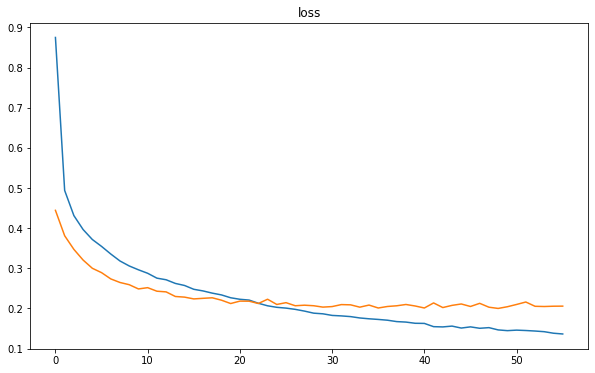

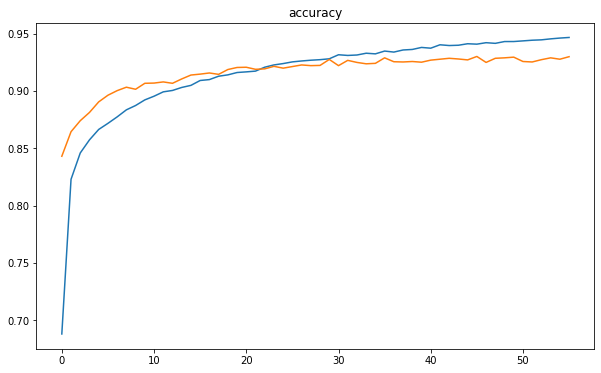

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same", activation="relu"), 
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),     
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
    
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


print("\nModel creation using the functions Conv2D e MaxPool2D\n")
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=300,callbacks=[early_stopping,modelcheck],
                    validation_data=(X_valid, y_valid))


model.summary()
plot_loss(history)

plot_accuracy(history)
model = load_model('best_model.h5')
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#######################################################################################################################

model1 = keras.models.Sequential([
    keras.layers.SeparableConv2D(32,3, padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.SeparableConv2D(64,3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.SeparableConv2D(128,3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(2),   
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
    
])
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


print("\nModel creation using the functions SeparableConv2D and MaxPooling2D\n")
early_stopping1 = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
modelcheck1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=300,callbacks=[early_stopping1,modelcheck1],
                    validation_data=(X_valid, y_valid))


model1.summary()
plot_loss(history1)

plot_accuracy(history1)
model1 = load_model('best_model1.h5')
scores = model1.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

### Test results discussion
The best model that I found is reported from this link:

[Model 1](https://drive.google.com/file/d/1dMgdop1Wz89mxhxZxv1uuxVhNizbG0uo/view)

Total parameter: 720,982

So in this model there are:

*   3 x (Conv2D+ReLU)
*   2 x MaxPool
*   After Flatten a Dense Layer with 100 units.
*   I added two dropout(0.5). The first between flatten and dense layer with 100 units. The second between dense layer with 100 units and the last layer with softmax activation function

The achieved accuracy in the test set is 0.9334.

#########################################################
#########################################################

I wanted to bring back another model, in addition to the previous one, which in the code I called model1. 
The difference in terms of code between the two models is that I used the SeparableConv2D function instead of Conv2D and MaxPooling2D instead of MaxPool2D.

I reported the model.summary from this link:

[Model 2](https://drive.google.com/open?id=1ErWT5-TAI2YM4ywhLXaFG7LNP7Tfg_wH)

This model is structured in the same way as the other.

The achieved accuracy in the test set is 0.9227



**Discussion:**

The new model perform significantly better (6.25%) than the model. in the Exercise3.1. In my opinion the new accuracy (93.34%) is a good result considering that the trainig set is "small" (55 000 instances) with respect to the number of weights of the network.

Regarding the second model I built there was also a good improvement here, although less than the first (5.18%). 

The plot of the validation loss of the first model (that a certain point starts increasing) show that it is overfitting, but regulatization is present and that we cannot increase training set It's acceptable.

Concerning the second plot there is less overfitting than previous. In fact, the depth separable convolution (layer SeparableConv2D) represents an almost equivalent but faster and more efficient overfitting solution than the one with Conv2D. 

So the SeparableConv2D layer can be used as a substitute for Conv2D, to obtain a more compact and faster network.

To sum up, the **conv2D**  is the traditional convolution. So, you have an image, with or without padding, and filter that slides through the image with a given stride.

On the other hand, the **SeparableConv2D** is a variation of the traditional convolution that was proposed to compute it faster. It performs a depthwise spatial convolution followed by a pointwise convolution which mixes together the resulting output channels

Besides, I also tested other models: 

* I tried different optimizers (sgd, adam and rmsprop): I found that the best was 'adam' (best error accuracy), and the worst was sgd. Rmsprop gave a good accuracy less than adam.

* I change the batch size with small and big values in a range [[50,500]]. I noticed that each epochs takes less time (because less updates to the weights happens) with big batch size. At the end I decided 300 batch size.

*  I rise the number of epochs to 40. The test error improves to near 0.90. I saw that with 100 epoche the improvement is better than 40 epoche.

* Regarding the model I used Dropout with 0.5. I also tried with 0.2 and 0.4, but I found the best result with 0.5.
Thanks to the dropout, if the neurons are randomly excluded from the net during training, the other neurons will have to intervene and manage the required representation to make predictions for the missing neurons. The effect is that the network becomes less sensitive to the specific weights of the neurons. This in turn results in a network that is able to improve generalization and is less likely to overuse training data, 

*  I added Early Stopping with patient 10.  The reason is that too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model.

*   Concerning the Dense layer, the size of the layer was at first 30, but then I tried higher values (50, 100, 200) and I found that 100 and  perfome better.


*   As shows in the model.summary() I added another Convolutional layer before the the first Pool  layer and then another Convolutional layer with 128 filters and the test accuracy increases. Notice at as my output spatial volume is decreasing my number of filters learned is increasing. 

* I tried to increase the size of first,second and thirs filter  and I didn't notice any improvement:
      filters: 32/64/128 , kernel_size: 3x3 - 5x5: 92/93%. So I decided to keep 3x3




**Conclusion:** 

To sum up, the steps that improved most the performance of the network were changing the optimizer, that affects a lot the learning process, and adding Dropout.

Concerning the better optimizer, I prefer Adam o Rmsprop than sgd for these configurations.

As activation function, I used ReLU for all layers except the last where it used the softmax.

As for the choice between two models that use two different types of functions regarding convolution layers, I noticed that:

* the first model using CONV2D has a higher accuracy but more overfitting. This is showed from the first two graphs

* the second model using SeparableConv2D, has less overfitting and less accuracy. This is showed from the last two graphs.



